## Parte III – Validação Holdout em Problema Não-Linearmente Separável
### Redes Neurais Artificiais - PP2
### Autor: Dayvson Silva - 1915310007
### Data: 05/09/2020

Esta tarefa consistiu em aplicar o percetron de Rosenblatt em uma tarefa Não-linearmente Separável, O primeiro passo foi implementar o percetron em Forma de classe para que a sua ultização posterior tivesse mais clareza. No primeiro momento foi plotado em um  Scatter plot o conjunto de dados, para se comprovar que se tratava de um problema não-linear.

## Importando as bibliotecas usadas na tarefa

In [50]:
import random
import itertools
import numpy as np
from matplotlib import pyplot as plt
from math import ceil, floor


## Lendo os dados do arquivo dataHoldout.txt

Ao realizar a leitura é todos os exemplos das entradas estão em uma mesma dimensão por isso, foi realizado um reshape no conjunto de dados.

In [51]:
dataset = np.fromfile('../dados/dataHoldout.txt')
number_instances = dataset.shape[0] // 3 ## 3 é quantidade de colunas
dataset = dataset.reshape(number_instances, 3)
dataset

array([[-0.29322959, -0.09065359,  1.        ],
       [ 0.07988839,  0.21101297,  1.        ],
       [-0.07825563, -0.08083512,  1.        ],
       ...,
       [ 0.65980493,  1.05876739,  0.        ],
       [ 1.09867123,  0.87404891,  0.        ],
       [ 0.72930655,  0.93224271,  0.        ]])

## Plotando o conjunto de dados

Imprimindo o cojunto de dados para identificar como os dados estão distribuidos, com a impressão fica claro que os dados são estão dispostos como um problema linear.

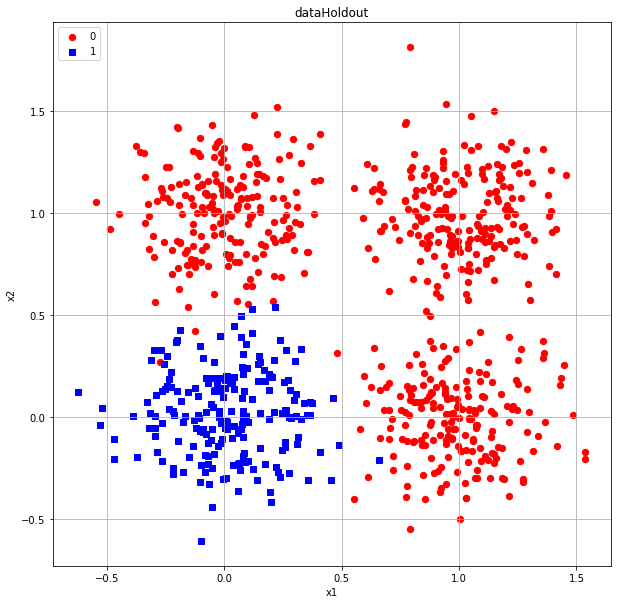

In [75]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
x = dataset[:,0][dataset[:, 2] == 0.0] # seleciona colunas 0 e target 0
y = dataset[:,1][dataset[:, 2] == 0.0] # seleciona colunas 1 e targe 0
ax.scatter(x, y, c='r', s=40, marker='o', label='0')
x = dataset[:,0][dataset[:, 2] == 1.0] # seleciona colunas 0 e target 1
y = dataset[:,1][dataset[:, 2] == 1.0] # seleciona colunas 1 e target 1
ax.scatter(x, y, c='b', s=40, marker='s', label='1')
ax.set_title('dataHoldout')
plt.legend(loc='upper left')
plt.ylabel('x2')
plt.xlabel('x1')
plt.grid(True)
plt.show()

In [53]:
#TODO: criar uma função de fronteira que delimite a os grupos

## Separando os dados em treino e teste

Criando funções para dividir o dataset em treino e teste e plotar esses dados para visualizar como eles estão dispostos

```
@method: criate data train and test

@parameters: dataset, percent

@return: x train and test and y train and test
```

number_instances_train=560
number_instances_test=240


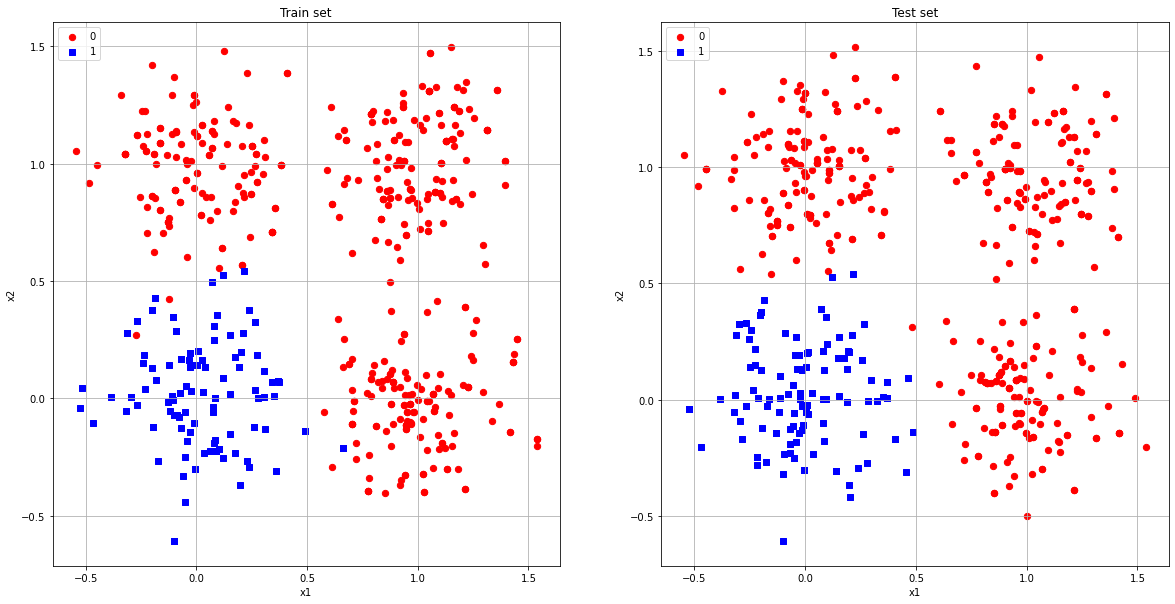

In [76]:
plt.figure(figsize=(20, 10))
def plot_set1(d, title, number_graph):
    plt.subplot(1, 2, number_graph)
    plt.scatter(d[:,0][d[:,2] == 0.0], d[:,1][d[:,2] == 0.0], marker='o', color='red', s=40, label='0')
    plt.scatter(d[:,0][d[:,2] == 1.0], d[:,1][d[:,2] == 1.0], marker='s', color='blue', s=40, label='1')
    plt.grid(True)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.ylabel('x2')
    plt.xlabel('x1')

def train_test_split(dataset, percent_train=.7):
    number_instances_train = ceil(len(dataset)*percent_train)
    number_instances_test = len(dataset) - number_instances_train
    print(f'number_instances_train={number_instances_train}')
    print(f'number_instances_test={number_instances_test}')
    index = np.random.randint(low=0, high=len(dataset), size=number_instances_train)
    plot_set1(dataset[index], 'Train set', 1)
    plot_set1(dataset[~index], 'Test set', 2)
    x_train = dataset[index][:,[0,1]]
    y_train = dataset[index][:, 2]
    x_test = dataset[~index][:, [0,1]]
    y_test = dataset[~index][:, 2]
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = train_test_split(dataset, .7)

## Importando o perceptron de Rosenblatt

*** Esta classe foi implemanta por mim e está no arquivo '../src/Perceptron.py'

In [6]:
import sys
sys.path.append('../')
from src.Perceptron import Perceptron

## Treinando um percetron com o conjuntos de treinamento

In [7]:
perceptron = Perceptron(no_of_inputs=2)
perceptron.fit(x_train, y_train)


	Época: 1
Pesos: [0.69812846 0.38893965 0.27327907]
Quantidade de Ajustes: 0

	Época: 2
Pesos: [-0.01187154 -0.02136288 -0.02060656]
Quantidade de Ajustes: 153

	Época: 3
Pesos: [-0.02187154 -0.04534061 -0.0297452 ]
Quantidade de Ajustes: 196

	Época: 4
Pesos: [-0.01187154 -0.04607762 -0.04373335]
Quantidade de Ajustes: 227

	Época: 5
Pesos: [-0.01187154 -0.04919791 -0.04242608]
Quantidade de Ajustes: 257

	Época: 6
Pesos: [-0.01187154 -0.04406468 -0.05336178]
Quantidade de Ajustes: 287

	Época: 7
Pesos: [-0.02187154 -0.05203711 -0.04460572]
Quantidade de Ajustes: 314

	Época: 8
Pesos: [-0.02187154 -0.05716588 -0.04504475]
Quantidade de Ajustes: 340

	Época: 9
Pesos: [-0.02187154 -0.04805163 -0.05638088]
Quantidade de Ajustes: 368

	Época: 10
Pesos: [-0.02187154 -0.05153732 -0.05602889]
Quantidade de Ajustes: 398

	Época: 11
Pesos: [-0.02187154 -0.05431175 -0.05353469]
Quantidade de Ajustes: 424

	Época: 12
Pesos: [-0.01187154 -0.05542904 -0.05995088]
Quantidade de Ajustes: 451

	Époc

## Fazendo a predição do conjunto de teste

In [8]:
y_pred = perceptron.predict(x_test)
y_pred

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 1.

## Gerando a matriz de confusão com os resultados preditos do conjunto de teste

In [9]:
results = np.array([y_test, y_pred])
true_positive = len(results[0][(results[0] == 1.0) & (results[1] == 1.0)])
true_negative = len(results[0][(results[0] == 0.0) & (results[1] == 0.0)])
false_positive = len(results[0][(results[0] == 0.0) & (results[1] == 1.0)])
false_negative = len(results[0][(results[0] == 1.0) & (results[1] == 0.0)])
confusion_matrix = np.array([[true_positive, false_positive], [false_negative,  true_negative]])
print(confusion_matrix)

[[137   9]
 [  4 410]]


## Plotando a matriz de confusão

O código da plotagem matriz de confusão pode ser visto no link

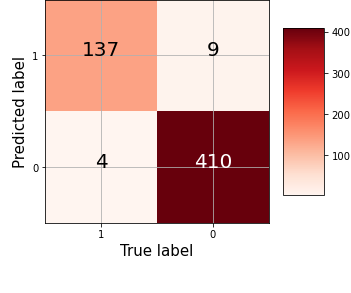

In [85]:
def plot_confusion_matrix(cm, classes=['1', '0'], normalize=False, title='Confusion matrix', cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    
    # Plot the confusion matrix
    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 18)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, size = 10)
    plt.yticks(tick_marks, classes, size = 10)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20, horizontalalignment="center",
                                                color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    #plt.tight_layout()
    plt.ylabel('Predicted label', size = 15)
    plt.xlabel('True label', size = 15)

plot_confusion_matrix(cm = confusion_matrix,title='Confusion matrix')

## Metricas de Desempenho

### Acurácia

In [12]:
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
accuracy

0.9767857142857143

### Precisão 

In [13]:
precision = true_positive/(true_positive + false_positive)
precision

0.9383561643835616

### Revocação

In [14]:
recall = true_positive/(true_positive + false_negative)
recall

0.9716312056737588

### F-Score

In [15]:
f_score = 2 * (precision * recall) / (precision + recall)
f_score

0.9547038327526133

## Plotando a solução para o conjuto de treino e de testes

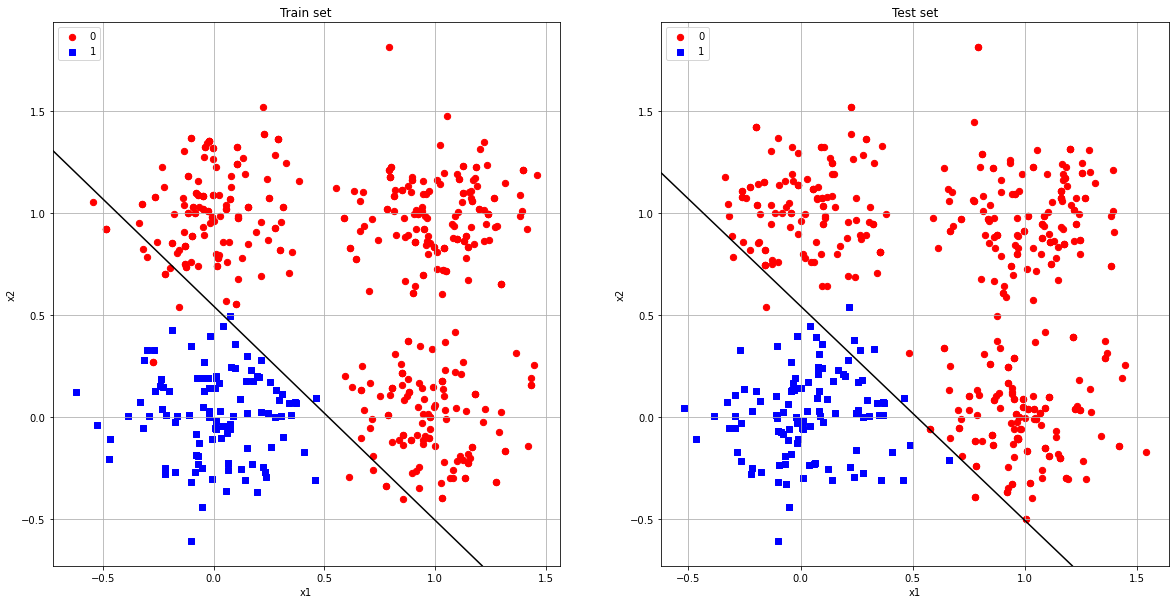

In [73]:
plt.figure(figsize=(20, 10))
def plot_set2(inputs, targets, weights, number_graph, title=''):
    d = []
    for i,o in zip(inputs,targets):
        d.append(np.append(i, o))
    d = np.array(d)
    
    plt.subplot(1, 2, number_graph)
    plt.grid(True)
    plt.scatter(d[:,0][d[:,2] == 0.0], d[:,1][d[:,2] == 0.0], marker='o', color='red', s=40, label='0')
    plt.scatter(d[:,0][d[:,2] == 1.0], d[:,1][d[:,2] == 1.0], marker='s', color='blue', s=40, label='1')
    plt.title(title)
    plt.legend(loc='upper left')
    plt.ylabel('x2')
    plt.xlabel('x1')

    # plotando a reta da solução
    # plot([0, weights[0]/weights[2]], [weights[0]/weights[1], 0]) #-> plot entre pontos
    slope = -(weights[0]/weights[2]) / (weights[0]/weights[1]) #-> inclinação da reta
    plt.axline((0, weights[0]/weights[2]), slope=slope, color="black") #-> plot para reta infinita
 
plot_set2(x_train, y_train , perceptron.weights, 1, 'Train set')
plot_set2(x_test, y_test , perceptron.weights, 2, 'Test set')